Manual Calculation
------------------
Slope (theta_1)  = 0.425
Intercept (theta_0) = 0.785

Sklearn Calculation
-------------------
Slope (theta_1)  = 0.425
Intercept (theta_0) = 0.785


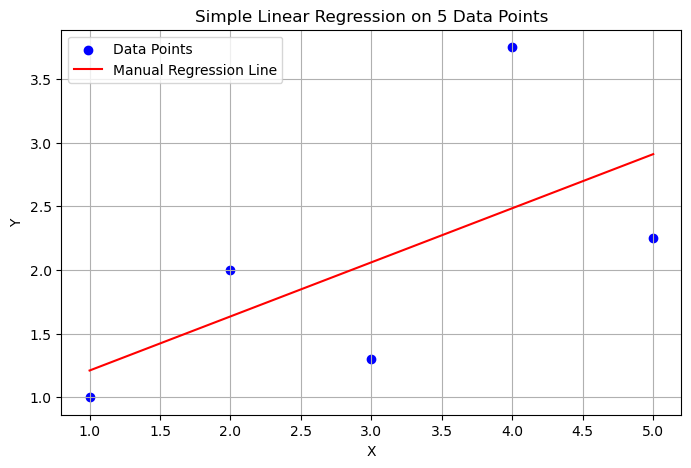

R^2 (linreg.score) = 0.393
R^2 (r2_score)     = 0.393
SSE = 2.791
SST = 4.597
Cost (1/2 * MSE) = 0.279
Cost (MSE)       = 0.558


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Load the (X,Y) data
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
Y = np.array([1.0, 2.0, 1.3, 3.75, 2.25])

###############################################################################
# 2A. Compute theta_0 and theta_1 manually using the closed-form formulas
###############################################################################

# Means of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Numerator and denominator for slope
num = 0.0
den = 0.0

for i in range(len(X)):
    num += (X[i] - mean_X) * (Y[i] - mean_Y)
    den += (X[i] - mean_X) ** 2

theta_1_manual = num / den
theta_0_manual = mean_Y - theta_1_manual * mean_X

print("Manual Calculation")
print("------------------")
print(f"Slope (theta_1)  = {theta_1_manual:.3f}")
print(f"Intercept (theta_0) = {theta_0_manual:.3f}\n")

###############################################################################
# 2B. Fit a linear regression model using sklearn (as a check)
###############################################################################
# sklearn expects X to be 2D, so reshape
X_2D = X.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(X_2D, Y)

theta_1_sklearn = linreg.coef_[0]
theta_0_sklearn = linreg.intercept_

print("Sklearn Calculation")
print("-------------------")
print(f"Slope (theta_1)  = {theta_1_sklearn:.3f}")
print(f"Intercept (theta_0) = {theta_0_sklearn:.3f}")

###############################################################################
# 3. Plot the scatter and the regression line
###############################################################################
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Data Points')

# Create a smooth range of X values for plotting the regression line
x_line = np.linspace(min(X), max(X), 100)
# Use manually computed slope/intercept
y_line_manual = theta_0_manual + theta_1_manual * x_line

plt.plot(x_line, y_line_manual, color='red', label='Manual Regression Line')

plt.title("Simple Linear Regression on 5 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score
Y_pred = linreg.predict(X_2D)

# Option 1: Use the built-in .score(...) method (which returns R^2)
r2_score_builtin = linreg.score(X_2D, Y)

# Option 2: Use r2_score(...)
r2_score_manual = r2_score(Y, Y_pred)

print(f"R^2 (linreg.score) = {r2_score_builtin:.3f}")
print(f"R^2 (r2_score)     = {r2_score_manual:.3f}")

# SSE: Sum of Squared Errors
SSE = np.sum((Y - Y_pred) ** 2)
# SST: Total Sum of Squares
mean_y = np.mean(Y)
SST = np.sum((Y - mean_y) ** 2)

# R^2 (two ways)
r2_via_score = linreg.score(X_2D, Y)
r2_via_formula = 1 - (SSE / SST)

# Print results
print(f"SSE = {SSE:.3f}")
print(f"SST = {SST:.3f}")

n = len(Y)
cost_half_mse = SSE / (2 * n)  # 1/(2n) * sum(...)
cost_mse      = SSE / n       # 1/n * sum(...)
print(f"Cost (1/2 * MSE) = {cost_half_mse:.3f}")
print(f"Cost (MSE)       = {cost_mse:.3f}")

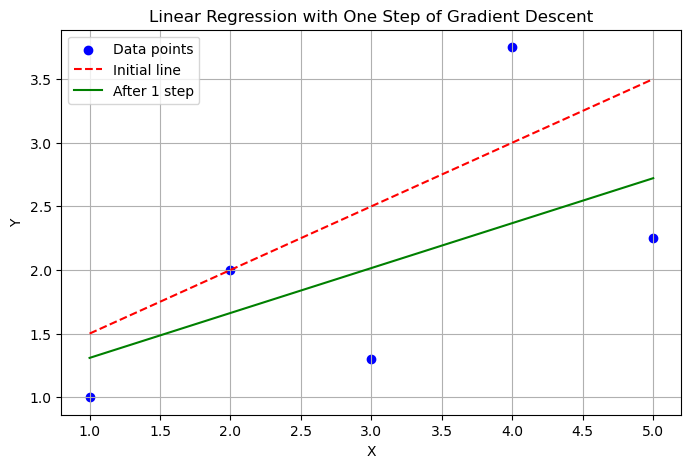

After one step of gradient descent:
  theta0 = 0.9560
  theta1 = 0.3530
  Cost    = 0.2853


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define our data
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
Y = np.array([1.0, 2.0, 1.3, 3.75, 2.25])

# 2) Initialize parameters
theta0 = 1.0
theta1 = 0.5

# A helper function to compute predictions for all X
def predict(X, t0, t1):
    return t0 + t1 * X

# A helper function to compute the cost (optional for monitoring)
def compute_cost(X, Y, t0, t1):
    m = len(X)
    predictions = predict(X, t0, t1)
    errors = predictions - Y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

# 3) Plot the data and the initial regression line
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Data points')

# Plot initial line
initial_preds = predict(X, theta0, theta1)
plt.plot(X, initial_preds, 'r--', label='Initial line')

# 4) Perform one step of gradient descent
alpha = 0.1  # learning rate
m = len(X)

# Compute partial derivatives
preds = predict(X, theta0, theta1)
errors = preds - Y
dtheta0 = (1/m) * np.sum(errors)
dtheta1 = (1/m) * np.sum(errors * X)

# Update thetas
theta0 = theta0 - alpha * dtheta0
theta1 = theta1 - alpha * dtheta1

# 5) Plot the updated regression line
updated_preds = predict(X, theta0, theta1)
plt.plot(X, updated_preds, 'g-', label='After 1 step')

plt.title("Linear Regression with One Step of Gradient Descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

print(f"After one step of gradient descent:")
print(f"  theta0 = {theta0:.4f}")
print(f"  theta1 = {theta1:.4f}")
print(f"  Cost    = {compute_cost(X, Y, theta0, theta1):.4f}")


[7.48357077, 10.11114763, 24.78165257, 44.8373715, 56.6687393, 82.22437694, 121.78495297, 153.1581613, 187.3439861, 237.71280022]


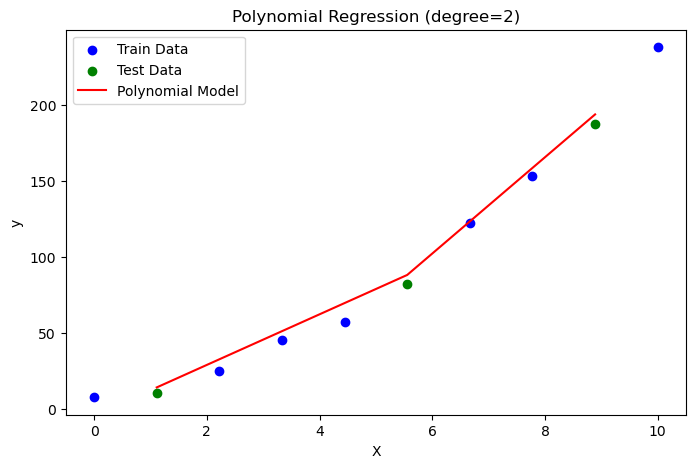

MSE on the test set: 28.37
R^2 on the test set:  0.99


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set a random seed for reproducibility
np.random.seed(42)

# Generate some feature values (X) — for instance, 100 points from 0 to 10
X = np.linspace(0, 10, 10)
X = X.reshape(-1, 1)  # Reshape to make X a 2D array (needed by scikit-learn)

# Create a polynomial relationship for y
# For example, y = 2x^2 + 3x + 5 + (small random noise)
y_true = 2 * X.flatten()**2 + 3 * X.flatten() + 5
noise = np.random.normal(0, 5, size=len(X))  # add some noise
y = [  7.48357077  ,10.11114763,  24.78165257 , 44.8373715  , 56.6687393, 82.22437694 ,121.78495297, 153.1581613 , 187.3439861  ,237.71280022]
print(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Create an instance of PolynomialFeatures with degree = 2
poly_features = PolynomialFeatures(degree=2)

# Transform the input data to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train a linear regression model on the transformed data
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test_poly)
# Sort the test predictions for a smooth curve
# (Sorting by X_test so we can plot lines properly)
sort_axis = np.argsort(X_test.flatten())
X_test_sorted = X_test[sort_axis]
y_pred_sorted = y_pred[sort_axis]

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_test_sorted, y_pred_sorted, color="red", label="Polynomial Model")
plt.title("Polynomial Regression (degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on the test set: {mse:.2f}")
print(f"R^2 on the test set:  {r2:.2f}")

